In [2]:
import pandas as pd

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
# require('theme538')

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: readr

R[write to console]: Loading required package: extrafont

R[write to console]: Registering fonts with R

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: Loading required package: reshape2



## Question: Are lower income households in New York City more likely to use electric medical equipment?

### Null hypothesis
- There is no relationship betwteen household income and whether they use electric medial equipment.

### Alternative hypothesis
- Household median income is related to whether they use electric medical equipment or not.

In [6]:
df = pd.read_csv("/Users/minjukim/Documents/GitHub/nyc_power_outage/empower/dme_income.csv")

In [7]:
df

,Unnamed: 0.1,Zip_Code,FIPS_Code,County_FIPS_Code,County,State_FIPS_Code,State,Jan_2022_Medicare_Benes,Jan_2022_Power_Dependent_Devices_DME,Feb_2022_Medicare_Benes,...,August,Unnamed: 0,Zipcode,Estimate,Margin of Error,Lower Estimate,Upper Estimate,geoid,median_household_income,"B19013001, Error"
0,0,10001,36061,61,New York,36,NY,4736,114,4720,...,2.544366,0,10001,25026,1759,23267,26785,86000US10001,96787.0,9861.0
1,1,10002,36061,61,New York,36,NY,18738,460,18731,...,2.586527,1,10002,74363,3183,71180,77546,86000US10002,35607.0,2214.0
2,2,10003,36061,61,New York,36,NY,8932,237,8913,...,2.692048,2,10003,54671,2568,52103,57239,86000US10003,129981.0,8865.0
3,3,10004,36061,61,New York,36,NY,811,16,807,...,2.098765,3,10004,3310,658,2652,3968,86000US10004,204949.0,12375.0
4,4,10005,36061,61,New York,36,NY,325,11,328,...,3.244838,4,10005,8664,906,7758,9570,86000US10005,184681.0,14575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,183,11691,36081,81,Queens,36,NY,9788,323,9741,...,3.343772,209,11691,68454,3192,65262,71646,86000US11691,52605.0,3067.0
174,184,11692,36081,81,Queens,36,NY,2971,69,2972,...,3.260146,210,11692,22394,1856,20538,24250,86000US11692,53077.0,7883.0
175,185,11693,36081,81,Queens,36,NY,2427,71,2430,...,2.894415,211,11693,13029,1251,11778,14280,86000US11693,52946.0,12260.0
176,186,11694,36081,81,Queens,36,NY,4478,102,4468,...,2.412038,212,11694,21258,1683,19575,22941,86000US11694,87755.0,7930.0


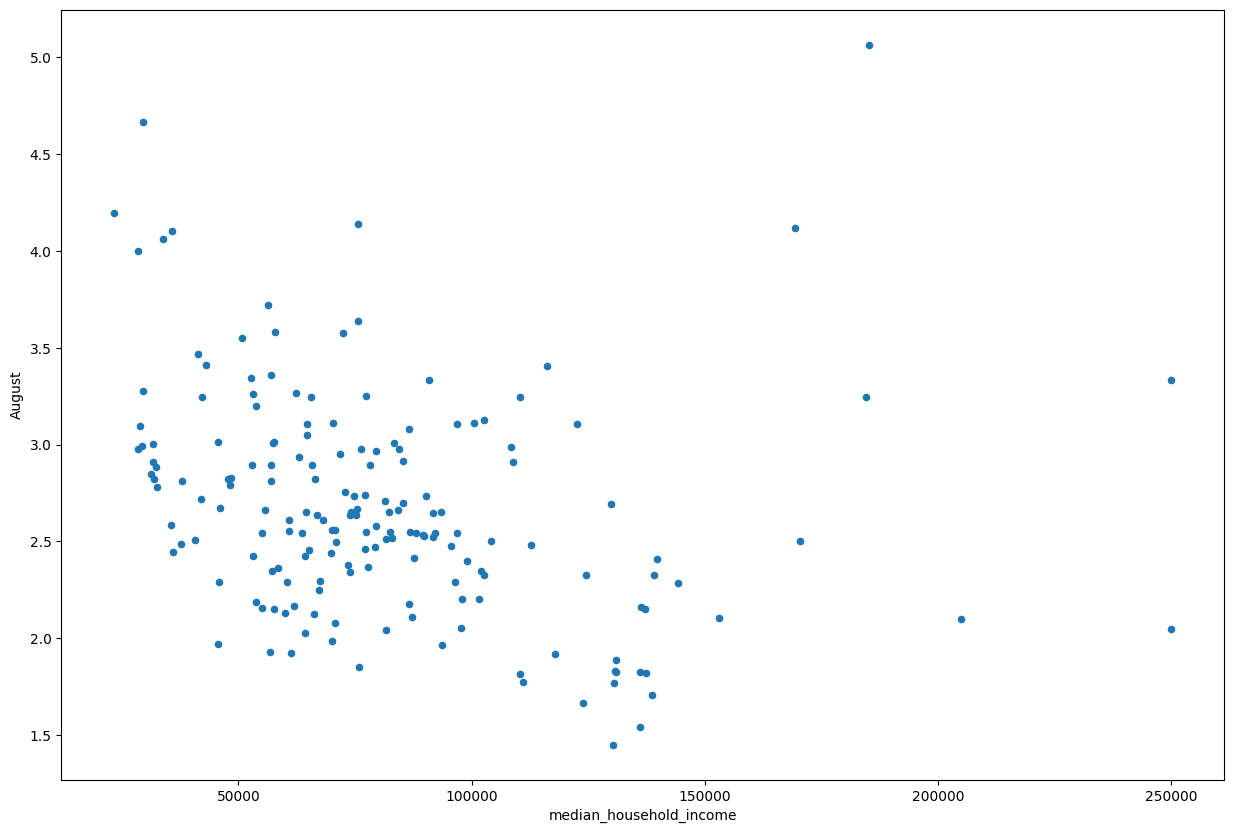

In [10]:
figsize=(600, 400)
scatter = df.plot.scatter(x='median_household_income', y='August', figsize=(15, 10))

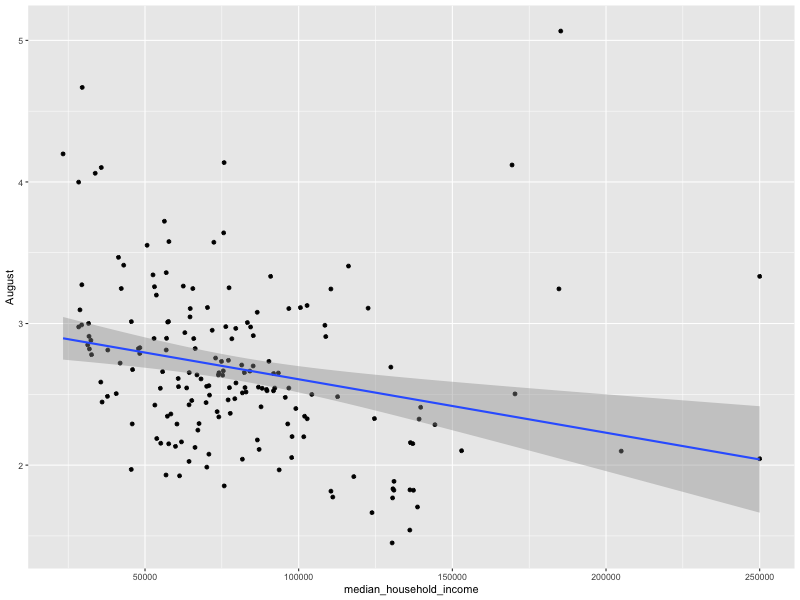

In [14]:
%%R -i df -w 800 -h 600

ggplot(df, aes(x=median_household_income, y=August)) +
    geom_point() + 
    geom_smooth(method='lm', formula= y~x)

In [15]:
%%R -i df -w 800 -h 600

model <- lm(August ~ median_household_income, data=df)

summary(model)


Call:
lm(formula = August ~ median_household_income, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0410 -0.3280 -0.0891  0.2465  2.7812 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              2.984e+00  9.873e-02  30.224  < 2e-16 ***
median_household_income -3.775e-06  1.100e-06  -3.432 0.000746 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5635 on 176 degrees of freedom
Multiple R-squared:  0.06273,	Adjusted R-squared:  0.0574 
F-statistic: 11.78 on 1 and 176 DF,  p-value: 0.0007465



### What can I learn from this statistical test?
- In a given zipcode, there is a relationship between its average household income and average dependency on electric medica lequipment. 

### What can I NOT learn from this statistical test?
- However, the statistical test shows that only 6 percent of the medical equipment users can be explained by the median household income. So it would not be accurate to look at a household income and attempt to determine whether they also use electric medical equipment. 

- Furthermore, while thhis shows the correlation between these two variables on a zip code level, it does not mean that the same relationship exists on a household level.


### Further reporting questions to answer
- There are 3-4 zip codes that are outliers to the trend, where tthey have both very high median income and hhigh dependency on electric medical equipment. Where are these zip codes, and what are some of the characteristics of these places? 

- What would happen if I control for age? If some zip codes are much older than others, then that would naturally skew my analysis. I would like to add another variable and take average age into a consideration, so I can only look at income as an independent variable.